# Shmem Distributed Direct

## Run Monolithic reference case

In [3]:
%%bash
cd ../../../
build/Examples/Cxx/ShmemDistributedReference

[14:00:29.854602 ShmemDistributedRef_console info] Opening interfaces.
[14:00:29.854656 ShmemDistributedRef_console info] Start simulation.
[14:00:29.869586 ShmemDistributedRef_console info] Simulation finished.


In [5]:
import villas.dataprocessing.readtools as rt
from villas.dataprocessing.timeseries import TimeSeries as ts

In [9]:
log_name = '../../../logs/ShmemDistributedRef/ShmemDistributedRef.csv'
ts_ref = rt.read_timeseries_dpsim(log_name)

column number: 4
results length: 100
real column names: []
complex column names: ['r02', 'r12', 'v1', 'v2']


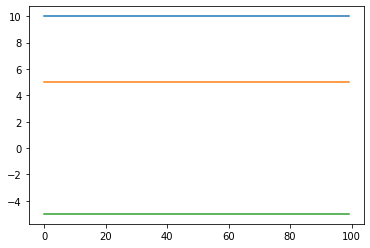

In [19]:
import matplotlib.pyplot as plt

plt.plot(ts_ref['v1'].values.real)
plt.plot(ts_ref['v2'].values.real)
plt.plot(ts_ref['r12'].values.real)

## Distributed

In [2]:
%%bash
cd ../../../
build/Examples/Cxx/ShmemDistributedDirect 0 & P1=$!
build/Examples/Cxx/ShmemDistributedDirect 1 & P2=$!
    
for job in $P1 $P2; do
    wait $job || exit 1
done

[14:00:19.267666 ShmemDistributedDirect_2_console info] Opening interfaces.
[14:00:19.267719 ShmemDistributedDirect_2_console info] Opening interface: /dpsim01 <-> /dpsim10
[14:00:19.273797 ShmemDistributedDirect_1_console info] Opening interfaces.
[14:00:19.273838 ShmemDistributedDirect_1_console info] Opening interface: /dpsim10 <-> /dpsim01
[14:00:19.274067 ShmemDistributedDirect_1_console info] Opened interface: /dpsim10 <-> /dpsim01
[14:00:19.274090 ShmemDistributedDirect_2_console info] Opened interface: /dpsim01 <-> /dpsim10
[14:00:19.274143 ShmemDistributedDirect_2_console info] Start simulation.
[14:00:19.274144 ShmemDistributedDirect_1_console info] Start simulation.
[14:00:19.289903 ShmemDistributedDirect_2_console info] Simulation finished.
[14:00:19.296314 ShmemDistributedDirect_1_console info] Simulation finished.


In [24]:
log_name = '../../../logs/ShmemDistributedDirect_1/ShmemDistributedDirect_1.csv'
ts_direct1 = rt.read_timeseries_dpsim(log_name)

column number: 5
results length: 100
real column names: []
complex column names: ['ievs', 'r12', 'v1', 'v2', 'vevs']


In [23]:
log_name = '../../../logs/ShmemDistributedDirect_2/ShmemDistributedDirect_2.csv'
ts_direct2 = rt.read_timeseries_dpsim(log_name)

column number: 4
results length: 100
real column names: []
complex column names: ['iecs', 'r02', 'v2', 'vecs']


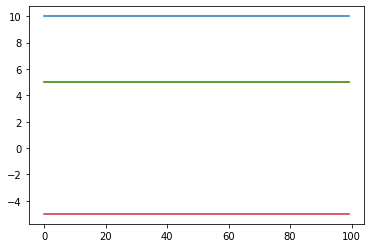

In [25]:
plt.plot(ts_direct1['v1'].values.real)
plt.plot(ts_direct1['v2'].values.real)
plt.plot(ts_direct2['v2'].values.real)
plt.plot(ts_direct1['r12'].values.real)